# Goals

1. Recommend more interesting books to users (beyond written by same author)

current book recommendation engines suggests books from the same author encoded by user

** option**: 
books based on mood (feel good)
books based on movies liked (con: no train data)
trending in that city/country
bought by same age group
based on hobbies (con: no train data)


**why:**
encourage people to read more  
help bookstores to increase their sales revenues


2. Cluster readers/books into different segments as basis for recommendation (unsupervised learning)
avid bookreader

easy cluster:
broad level genre type (fiction vs non-fiction)
specific genre (art, biography, business, children's, classics,etc) 

https://www.goodreads.com/genres

https://www.amazon.com/books-used-books-textbooks/b?ie=UTF8&node=283155


3. Predict book rating (supervised learning)


# Loading Dataset

In [1]:
# data munging 
import pandas as pd
import numpy as np
import requests
from io import StringIO


# visualization
%matplotlib inline
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns

### Ratings

In [2]:
rating = pd.read_csv("BX-Book-Ratings.csv", delimiter = ";", escapechar ="\\")

In [3]:
print rating.shape
rating.head()

(1149780, 3)


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [4]:
print "unique User-ID:" , rating["User-ID"].nunique()
print "total obs vs  User-ID (%)::",float((105283)/1149780.0)

print "unique ISBN:", rating["ISBN"].nunique()
print "total obs vs  ISBN (%):", float((340556)/1149780.0)

unique User-ID: 105283
total obs vs  User-ID (%):: 0.09156795213
unique ISBN: 340556
total obs vs  ISBN (%): 0.296192315052


#### 1,149,780 ratings of 340,556 books by 105,283
some books are rated more than once it seems as ratings count > unique books count
User-ID count != User-ID nunique

In [5]:
rating["User-ID"] = rating["User-ID"].astype('category')
rating["User-ID"].head()

# categories = 105283, should be = to User-ID nunique
#source: http://pandas-docs.github.io/pandas-docs-travis/categorical.html

0    276725
1    276726
2    276727
3    276729
4    276729
Name: User-ID, dtype: category
Categories (105283, int64): [2, 7, 8, 9, ..., 278849, 278851, 278852, 278854]

In [6]:
rating["ISBN"] = rating["ISBN"].astype('category')
rating["ISBN"].head()
# categories = 340556, should be equal to ISBN nunique

0    034545104X
1    0155061224
2    0446520802
3    052165615X
4    0521795028
Name: ISBN, dtype: category
Categories (340556, object): [0330299891, 0375404120, 0586045007, 9022906116, ..., ooo7156103, �423350229, �3499128624, Խcrosoft]

In [7]:
rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [8]:
rating.describe()

,Book-Rating
count,1.149780e+06
mean,2.866950e+00
std,3.854184e+00
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,7.000000e+00
max,1.000000e+01


In [9]:
# Check for Nulls
print "NULL presence:", rating.isnull().values.any()
print "Total Missing:", rating.isnull().values.sum()

NULL presence: False
Total Missing: 0


## Univariate Graphical EDA

In [10]:
# # histogram of book ratings
# x = rating["Book-Rating"]
# sns.distplot(x, kde = False, rug = True)

In [11]:
#sns.distplot(x ="Book-Rating", data = rating)

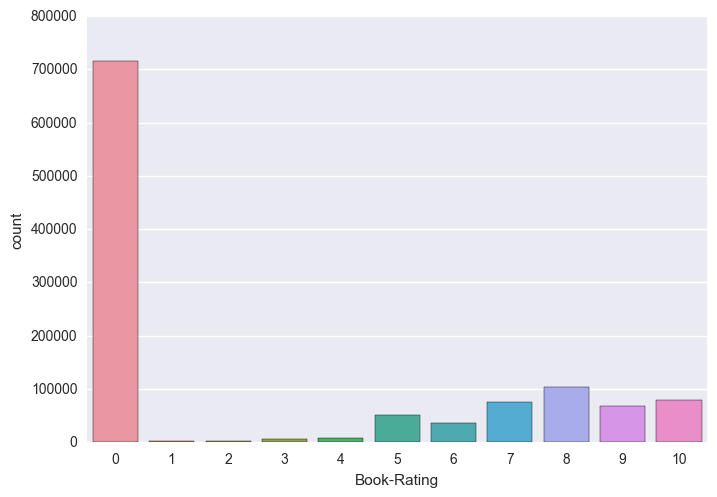

In [12]:
ax = sns.countplot(x="Book-Rating", data=rating)

# source: http://seaborn.pydata.org/generated/seaborn.countplot.html
# need to visualize without rating = 0
# what to do with books with rating = 0 accounting for 700k

### Books

In [13]:
books = pd.read_csv("BX-Books.csv", delimiter = ";", escapechar ="\\")

In [14]:
print books.shape
books.head()

(271379, 8)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [15]:
books.describe()

,Year-Of-Publication
count,271379.000000
mean,1959.756050
std,258.011363
min,0.000000
25%,1989.000000
50%,1995.000000
75%,2000.000000
max,2050.000000


In [16]:
print "NULL presence:", books.isnull().values.any()
print  "Total Missing:", books.isnull().values.sum()
print "missing ISBN:",books[[1]].isnull().values.sum()
print "missing Book-Title:",books[[2]].isnull().values.sum()
print "missing Book-Author:", books[[3]].isnull().values.sum()
print "missing Year-Of-Publication:", books[[4]].isnull().values.sum()
print "missing Publisher:", books[[5]].isnull().values.sum()
print "missing Image-URL-S:",books[[6]].isnull().values.sum()
print "missing Image-URL-M:",books[[7]].isnull().values.sum()
print "missing Image-URL-L:", books['Image-URL-L'].isnull().values.sum()

NULL presence: True
Total Missing: 2
missing ISBN: 0
missing Book-Title: 0
missing Book-Author: 0
missing Year-Of-Publication: 2
missing Publisher: 0
missing Image-URL-S: 0
missing Image-URL-M: 0
missing Image-URL-L: 0


In [17]:
print "unique ISBN:", books["ISBN"].nunique()
print "unique Book-Title:",books["Book-Title"].nunique()
print "unique Book-Author:", books["Book-Author"].nunique()
print "unique Year-Of-Publication:", books["Year-Of-Publication"].nunique()
print "unique Publisher:", books["Publisher"].nunique()
print "unique Image-URL-S:",books["Image-URL-S"].nunique()
print "unique Image-URL-M:",books["Image-URL-M"].nunique()
print "unique Image-URL-L:", books['Image-URL-L'].nunique()
print "total rows,col:",  books.shape

unique ISBN: 271379
unique Book-Title: 242154
unique Book-Author: 102028
unique Year-Of-Publication: 116
unique Publisher: 16806
unique Image-URL-S: 271063
unique Image-URL-M: 271063
unique Image-URL-L: 271063
total rows,col: (271379, 8)


In [18]:
books["ISBN"] = books["ISBN"].astype('category')
books["ISBN"].head()

0    0195153448
1    0002005018
2    0060973129
3    0374157065
4    0393045218
Name: ISBN, dtype: category
Categories (271379, object): [0000913154, 0001010565, 0001046438, 0001046713, ..., B000234NC6, B00029DGGO, B0002JV9PY, B0002K6K8O]

In [19]:
books["Publisher"] = books["Publisher"].astype("category")
books["Publisher"].head()

0       Oxford University Press
1         HarperFlamingo Canada
2               HarperPerennial
3          Farrar Straus Giroux
4    W. W. Norton &amp; Company
Name: Publisher, dtype: category
Categories (16806, object): [Editions P. Terrail, Tri-State Press, "Corvina", "Nauka", ..., �?sterreichische Staatsdruckerei, �?sterreichischer Bundesverlag, �?�?ditions 10/18, �?¶bv&amp;hpt]

### Univariate Graphical EDA

In [20]:
# visualize top 50 books 

In [21]:
# visualize top 50 publishers (based on number of published books)

In [22]:
countsPub = books.groupby("Publisher").size(); counts

countsPublisher = pd.DataFrame(books.groupby('Publisher').size().rename('countsPub'))
countsPublisher = countsPublisher.sort_values(["countsPub"], ascending = [False])
countsPublisher20 = countsPublisher.head(20)

# http://stackoverflow.com/questions/19384532/how-to-count-number-of-rows-in-a-group-in-pandas-group-by-object

NameError: name 'counts' is not defined

In [ ]:
countsPublisher20 = pd.DataFrame(countsPublisher20)
countsPublisher20.shape
countsPublisher20

In [ ]:
#sns.barplot(x="Publisher", y="countsPub", data=countsPublisher20)

In [ ]:
# visualize top 10 author (based on number of books written)

### Users

In [51]:
users = pd.read_csv("BX-Users.csv", delimiter = ";", escapechar ="\\")

In [52]:
print users.shape
users.head()

(278858, 3)


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [53]:
print "NULL presence:", users.isnull().values.any()
print "Total Missing:", users.isnull().values.sum()
print "missing User-ID:", users["User-ID"].isnull().values.sum()
print "missing Location:", users["Location"].isnull().values.sum()
print "missing Age:", users["Age"].isnull().values.sum()

NULL presence: True
Total Missing: 110762
missing User-ID: 0
missing Location: 0
missing Age: 110762


In [54]:
type(users["Age"])

pandas.core.series.Series

In [55]:
users["Age"] = pd.to_numeric(users["Age"])

In [56]:
np.mean(users["Age"])

34.75143370454978

In [57]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,NaN
50%,139429.50000,NaN
75%,209143.75000,NaN
max,278858.00000,244.000000


In [58]:
users["User-ID"].nunique()

278858

In [ ]:
278858 - 278858

In [50]:
#users["Location"] , users["State"],users["Country"]  = users['Location'].str.split(', ', 2, expand=True)

In [59]:
users.head()
# need to split location into city, state, country (3 columns)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Univariate Graphical EDA

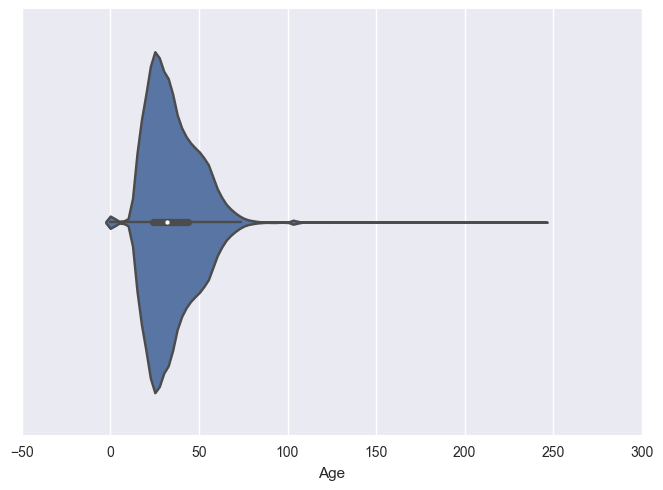

In [35]:
sns.violinplot(users['Age']) 
sns.despine()
# it appears like we need to do some age cleaning; figure out what to do with >80
# 71.4 years was the average life expectancy at birth of the global population in 2015.
# http://www.who.int/gho/mortality_burden_disease/life_tables/situation_trends/en/
# options: 1.replace with global average or 2.figure out per country ave and use that

In [95]:
users2 = pd.DataFrame(users)

In [61]:
users2.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [101]:
users2 = users2[["User-ID", "Age", "Location"]]
users2.head()
users2[[-1]]

,Location
0,"nyc, new york, usa"
1,"stockton, california, usa"
2,"moscow, yukon territory, russia"
3,"porto, v.n.gaia, portugal"
4,"farnborough, hants, united kingdom"
5,"santa monica, california, usa"
6,"washington, dc, usa"
7,"timmins, ontario, canada"
8,"germantown, tennessee, usa"
9,"albacete, wisconsin, spain"


In [62]:
users2["State"] = ""
users2["Country"] = ""
users2.head()
# add 2 new columns "State", "Country"

,User-ID,Location,Age,State,Country
0,1,"nyc, new york, usa",NaN,,
1,2,"stockton, california, usa",18.0,,
2,3,"moscow, yukon territory, russia",NaN,,
3,4,"porto, v.n.gaia, portugal",17.0,,
4,5,"farnborough, hants, united kingdom",NaN,,


In [87]:
users2["Location"].astype("string")
users2["Location"].head()


0                    nyc, new york, usa
1             stockton, california, usa
2       moscow, yukon territory, russia
3             porto, v.n.gaia, portugal
4    farnborough, hants, united kingdom
Name: Location, dtype: object

In [88]:
users2["Location"].str.split(', ', 2, expand = True)
# how to save it back to the dataframe users2 in their respective columns?

,0,1,2
0,nyc,new york,usa
1,stockton,california,usa
2,moscow,yukon territory,russia
3,porto,v.n.gaia,portugal
4,farnborough,hants,united kingdom
5,santa monica,california,usa
6,washington,dc,usa
7,timmins,ontario,canada
8,germantown,tennessee,usa
9,albacete,wisconsin,spain


In [89]:
users2["Location"].str.split(', ', 2, expand = True).rename(columns={0:'city', 1:'state', 2:'country'})

,city,state,country
0,nyc,new york,usa
1,stockton,california,usa
2,moscow,yukon territory,russia
3,porto,v.n.gaia,portugal
4,farnborough,hants,united kingdom
5,santa monica,california,usa
6,washington,dc,usa
7,timmins,ontario,canada
8,germantown,tennessee,usa
9,albacete,wisconsin,spain


In [ ]:
pd.concat([users2[:], axis=1])

In [90]:
user3 = users2["Location"].str.split(', ', 2, expand = True).rename(columns={0:'city', 1:'state', 2:'country'})
user3.head()

,city,state,country
0,nyc,new york,usa
1,stockton,california,usa
2,moscow,yukon territory,russia
3,porto,v.n.gaia,portugal
4,farnborough,hants,united kingdom


In [111]:
users2[[0,1,2]].head()

,User-ID,Age,Location
0,1,NaN,"nyc, new york, usa"
1,2,18.0,"stockton, california, usa"
2,3,NaN,"moscow, yukon territory, russia"
3,4,17.0,"porto, v.n.gaia, portugal"
4,5,NaN,"farnborough, hants, united kingdom"


In [117]:
users2[[3,4,5]] = users2["Location"].str.split(', ', 2, expand = True).rename(columns={3:'City', 4:'State', 5:'Country'})

In [118]:
users2.head()

,User-ID,Age,Location,3,4,5
0,1,NaN,"nyc, new york, usa",nyc,new york,usa
1,2,18.0,"stockton, california, usa",stockton,california,usa
2,3,NaN,"moscow, yukon territory, russia",moscow,yukon territory,russia
3,4,17.0,"porto, v.n.gaia, portugal",porto,v.n.gaia,portugal
4,5,NaN,"farnborough, hants, united kingdom",farnborough,hants,united kingdom


In [119]:
users2

,User-ID,Age,Location,3,4,5
0,1,NaN,"nyc, new york, usa",nyc,new york,usa
1,2,18.0,"stockton, california, usa",stockton,california,usa
2,3,NaN,"moscow, yukon territory, russia",moscow,yukon territory,russia
3,4,17.0,"porto, v.n.gaia, portugal",porto,v.n.gaia,portugal
4,5,NaN,"farnborough, hants, united kingdom",farnborough,hants,united kingdom
5,6,61.0,"santa monica, california, usa",santa monica,california,usa
6,7,NaN,"washington, dc, usa",washington,dc,usa
7,8,NaN,"timmins, ontario, canada",timmins,ontario,canada
8,9,NaN,"germantown, tennessee, usa",germantown,tennessee,usa
9,10,26.0,"albacete, wisconsin, spain",albacete,wisconsin,spain


## Book Readers: World Choropleth Map

https://plot.ly/python/choropleth-maps/

In [122]:
import plotly 
plotly.tools.set_credentials_file(username='chrisanalytics', api_key='••••••••••')

In [126]:
{
    "username": "chrisanalytics",
    "stream_ids": ["ylosqsyet5", "h2ct8btk1s", "oxz4fm883b"],
    "api_key": "••••••••••"
}

{'api_key': '\xe2\x80\xa2\xe2\x80\xa2\xe2\x80\xa2\xe2\x80\xa2\xe2\x80\xa2\xe2\x80\xa2\xe2\x80\xa2\xe2\x80\xa2\xe2\x80\xa2\xe2\x80\xa2',
 'stream_ids': ['ylosqsyet5', 'h2ct8btk1s', 'oxz4fm883b'],
 'username': 'chrisanalytics'}

In [127]:
import plotly.plotly as py
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

data = [ dict(
        type = 'choropleth',
        locations = df['CODE'],
        z = df['GDP (BILLIONS)'],
        text = df['COUNTRY'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '$',
            title = 'GDP<br>Billions US$'),
      ) ]

layout = dict(
    title = '2014 Global GDP<br>Source:\
            <a href="https://www.cia.gov/library/publications/the-world-factbook/fields/2195.html">\
            CIA World Factbook</a>',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate="••••••••••", filename='d3-world-map' )

PlotlyError: Invalid 'figure_or_data' argument. Plotly will not be able to properly parse the resulting JSON. If you want to send this 'figure_or_data' to Plotly anyway (not recommended), you can set 'validate=False' as a plot option.
Here's why you're seeing this error:

'autotick' is not allowed in 'colorbar'

Path To Error: ['data'][0]['colorbar']['autotick']

Valid attributes for 'colorbar' at path ['data'][0]['colorbar'] under parents ['figure', 'data', 'choropleth']:

    ['yanchor', 'showexponent', 'showticklabels', 'lenmode',
    'showticksuffix', 'titlefont', 'borderwidth', 'tickvalssrc', 'nticks',
    'showtickprefix', 'titleside', 'outlinecolor', 'tickprefix',
    'tickformat', 'tickmode', 'title', 'ticks', 'thickness', 'bgcolor',
    'outlinewidth', 'ticktextsrc', 'bordercolor', 'xanchor',
    'separatethousands', 'ticklen', 'len', 'ticksuffix', 'tickcolor',
    'ticktext', 'xpad', 'tickvals', 'tickfont', 'tickwidth', 'tick0',
    'tickangle', 'dtick', 'ypad', 'exponentformat', 'y', 'x',
    'thicknessmode']

Run `<colorbar-object>.help('attribute')` on any of the above.
'<colorbar-object>' is the object at ['data'][0]['colorbar']